# <font style = "color:rgb(77, 173, 255)"> **Diamonds - Descriptive Analytics Book 1** </font>

## <font style = "color:rgb(77, 173, 255)"> **Business Case** </font>

The purpose of analyzing the `Diamonds` dataset is to determine if either a **classification** or **regression** pattern can be found in the data.

Our goal is to gain insights on the information. We hope to convert this insight into foresight (predictions) according to the patterns we see in the data.

In [59]:
# Libraries used in this notebook

import ipywidgets as widgets

import numpy as np

import pandas as pd

import plotly.express as px

import plotly.figure_factory as ff
 
import seaborn as sns

## <font style = "color:rgb(77, 173, 255)"> **Importing the data** </font>

The folowing scripts will import and quickly inspect the data:

In [17]:
# Path to data source

diamond_data_source = "../Diamonds/diamond.csv"

In [18]:
# Create a panda data frame object called 'df'. This object holds the contents of our data in tabular format

df = pd.read_csv(diamond_data_source, 
                )

df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


## <font style = "color:rgb(77, 173, 255)"> **Inspecting the data** </font>

Inspecting your data is the process of identifying:

1. There are no missing values
2. The dytpes are correct
3. The type of information contained in each feature
4. Classifying this data as either [categorical](http://www.stat.yale.edu/Courses/1997-98/101/catdat.htm) or [continous](https://www.mathsisfun.com/definitions/continuous-data.html) data 
5. Identifying potential features that could be a **target** or **class label**.

### <font style = "color:rgb(77, 173, 255)"> **How to inspect your data** </font>

You can quickly inspect your data set using the following commands:

> `df.info()` - Prints a summary of the data set. You can find more information about it here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

> `df.describe()` - Generates descriptive statistics, for numerical features (continous or categorical). You can find more information about how to use it here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

> `df.value_counts` - Returns a series containing counts of unique values, found in a feature. Is used to assess categorical values, regardless if they are numeric or not. You can find more information about how to use it here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html.

In the cells below, you will use these commands to inspect the features.

In [19]:
# Check for missing values and inspect dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


There are no missing values, and the dytpes look ok.

In [20]:
# Generate descriptive stats for numerical features

df['Carat Weight'].describe()

count    6000.000000
mean        1.334520
std         0.475696
min         0.750000
25%         1.000000
50%         1.130000
75%         1.590000
max         2.910000
Name: Carat Weight, dtype: float64

In [21]:
# Inspect categorical information about your feature

df['Carat Weight'].value_counts()

1.01    448
0.90    373
1.00    285
2.01    248
1.02    190
       ... 
1.82      1
2.68      1
2.76      1
2.81      1
1.87      1
Name: Carat Weight, Length: 196, dtype: int64

Although this data set only contains 8 features, it would be tedious to inspect all the features this way, therefore let's automate this process.

**First** let's create a list of features for us to inspect. We do this by calling the `df.columns()` method. You can learn more about his method here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html.

In [22]:
# Create a list that will hold the names of the columns, so we can inspect each feature.

features = df.columns

features

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price'],
      dtype='object')

#### <font style = "color:rgb(77, 173, 255)"> **Interactive widget** </font>

The following is an interactive widget that you can use to inspect each feature, in order to better understand your data:

In [23]:
@widgets.interact
def feature_describer(variable = features):
    print("Categorical Information")
    print(df[variable].value_counts())
    print('\n')
    print("Continous Information")
    print(df[variable].describe())

interactive(children=(Dropdown(description='variable', options=('Carat Weight', 'Cut', 'Color', 'Clarity', 'Po…

In [ ]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

## <font style = "color:rgb(77, 173, 255)"> **Definitions** </font>

In order to understand this data set, the following definitions will be applied, these defintions come from the following websites: 

> https://4cs.gia.edu/en-us/diamond-carat-weight/ 

> https://beyond4cs.com/grading/polish-and-symmetry/ 

> https://www.briangavindiamonds.com/news/gia-versus-agsl-diamond-grading-reports/

**Definitions**

* `Carat` - diamond carat weight measures how much a diamond weighs. A diamond price increases with diamond carat weight because larger diamonds are rarer and more desirable. However, two diamonds of equal carat weight can have very different values (and prices) depending on three other factors of the diamond 4Cs: Color, Clarity, and Cut.

* `Cut` - diamonds are renowned for their ability to transmit light and sparkle so intensely. Cut measures how well a diamond’s facets interact with light. Precise artistry and workmanship are required to fashion a stone so its proportions, symmetry and polish deliver the magnificent return of light only possible in a diamond. Achieving the best cut for a diamond reflects in the stone’s final beauty and value. And of all the diamond 4Cs, it is the most complex and technically difficult to analyze. To determine the cut grade of the standard round brilliant diamond – the shape that dominates the majority of diamond jewelry.

* `Color` - the diamond color evaluation of most gem-quality diamonds is based on the absence of color. A chemically pure and structurally perfect diamond has no hue, like a drop of pure water, and consequently, a higher value.

* `Clarity` - natural diamonds are the result of carbon exposed to tremendous heat and pressure deep in the earth. This process can result in a variety of internal characteristics called ‘inclusions’ and external characteristics called ‘blemishes.’  If you are trying to determine what is the best clarity for a diamond, remember that no diamond is perfectly pure. But the closer it comes to purity, the better its clarity.

* `Polish` - a well polished diamond can produce crisp reflections and undistorted light transmission while a poorly polished diamond can look dull.

* `Symmetry` - a diamond with poor symmetry will have a visible deviation from its shape and reduced brilliance due to misdirected light transmission.

* `Report` - either from the `Gemological Institute of America (GIA)` and the `American Gem Society Laboratory (AGSL)`. There is a distinct difference in how the two gemological laboratories determine the Overall Cut Grade of a diamond, while the `GIA` determines the cut grade of a diamond by taking polish, symmetry, and proportions into account, the `AGSL` uses a performance based system which takes those factors, plus the visual performance of the diamond into account. The diamond grading platform currently relied upon by the `AGSL`, is the most thorough of the cut grade systems in use by any of the top tier gemological laboratories. 

## <font style = "color:rgb(77, 173, 255)"> **Data Dictionary** </font>



The following is a description of the features found in this dataset

|Index   | Feature         | Description                                                                                    | Categorical or Continous |  Range     |
|:------ |:----------------|:-----------------------------------------------------------------------------------------------|:-------------------------|:-----------|
| 0      | Carat Weight    |Carat weight of the diamond                                                                     |Continous                 |0.75 to 2.91|
| 1      | Cut             |Describe cut quality of the diamond                                                             |Categorical               |Fair, Good, Very Good, Ideal, Signature-Ideal |
| 2      | Color           |Color of the diamond                                                                            |Categorical               |D (Best?), E, F, G, H, I (Worst?) |
| 3      | Clarity         |How obvious are any inclusions within the diamond:                                              |Categorical               |FL (Best), IF, VVS1, VVS2, VS1, VS2, SI1 (Worst) |
| 4      | Polish          |Refers to the overall smoothness and condition of the diamond’s surface                         |Categorical               |EX (Best), VG, G, ID (Worst?) |
| 5      | Symmetry        |Refers to the exactness of shape, overall outline, placement and alignment of individual facets |Categorical               |EX (Best), VG, G, ID (Worst?) |
| 6      | Report          |Was the report prepared by GIA or AGSL                                                          |Categorical               |GIA, AGSL                     |
| 7      | Price           |The price the diamond was sold for                                                              |Continous                 |2184.00 to 101,561.00         |

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


# <font style = "color:rgb(77, 173, 255)" > **Data Understanding** </font>

This section is meant to help us understand our data bu gaining insights on the descriptive statistics of each feature. To do this, we get an understanding of the distribution of the data in each feature, and see if can be lead to any preliminary hypothesis about what patterns are going to be found in the data.  

## <font style = "color:rgb(77, 173, 255)" > **Pie-Charts** </font>

The purpose of a pie chart is to show you [a parts-to-whole relationship for categorical or nominal data](https://www.jmp.com/en_us/statistics-knowledge-portal/exploratory-data-analysis/pie-chart.html). Pie charts work best with [categorical data](http://www.stat.yale.edu/Courses/1997-98/101/catdat.htm). Pie charts should not be used with [continous data](https://www.mathsisfun.com/definitions/continuous-data.html).

You can learn more about pie charts, and where to use them at [storytellingwithdata.com](https://www.storytellingwithdata.com/blog/2020/5/14/what-is-a-pie-chart), and the [Statistical Knowledge Portal](https://www.jmp.com/en_us/statistics-knowledge-portal/exploratory-data-analysis/pie-chart.html)

The following code makes a few simple pie charts using the plotly library. You can learn more about plotly pie charts here: https://plotly.com/python/pie-charts/

### <font style = "color:rgb(77, 173, 255)"> **Example 1 - Simple Pie Chart** </font>

This is a simple pie-chart. Remember that pie-charts work best with categorical data.

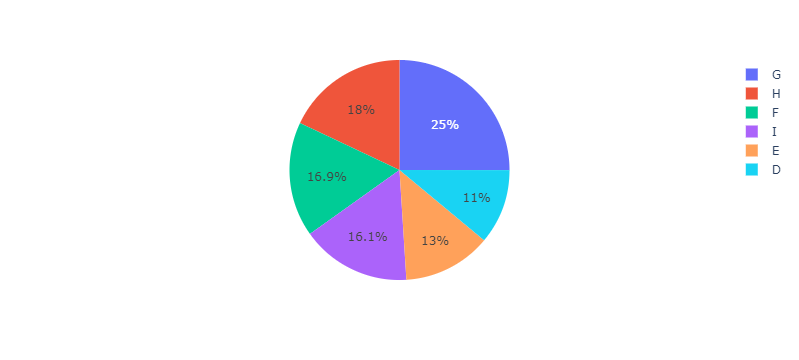

In [40]:
# This example plots a simple pie chart.
# Change the name of the feature, but remember that 
# Pie-Charts are best for categorical features

fig = px.pie(df, 
             values = None, 
             names = 'Color',
            )

fig.show()

### <font style = "color:rgb(77, 173, 255)"> **Example 2 - Interactive Pie Chart** </font>

The following steps creates an interactive pie-chart, one that you can use to inspect all categorical features.

**Note**

Pie charts works best when inspecting `categorical features`. Continous values will plot, but the results are typically not be meaningful.

In [27]:
# Create a list of categorical features
categorical_features = ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']

In [29]:
# Create a function to inspect categorical features using a pie-chart
@widgets.interact
def pie_charts(feature = categorical_features):
    fig = px.pie(df, 
                 values = None, 
                 names = feature,
                 height = 600,
                 width = 800
                )

    fig.show()

interactive(children=(Dropdown(description='feature', options=('Cut', 'Color', 'Clarity', 'Polish', 'Symmetry'…

### <font style = "color:rgb(77, 173, 255)"> **Questions to ask yourself when analyzing a pie chart** </font>

When analyzing pie-charts, ask yourself these questions related to the distribution of information:

1. Do you understand the meaning of the information stored in this feature?
2. Could this be a target feature (review labels)?
3. Is the distribution of data in this feature balanced or imbalanced?
4. Suppose you had a pie-chart that stored the ratings between 1 to 5, with 5 being the best. What if 5 stars only made up 7% of all ratings? In situations like this, where you have high value information, but not allot of it, how would you address?

## <font style = "color:rgb(77, 173, 255)"> **Histograms** </font>

[Histograms show the shape of your data](https://www.jmp.com/en_us/statistics-knowledge-portal/exploratory-data-analysis/histogram.html). Histograms help you see the center, spread and shape of a set of data. You can also use them as a visual tool to check for normality.

You can learn more about histograms, and where to use them at [storytellingwithdata.com](https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts) and the [Statistical Knowledge Portal](https://www.jmp.com/en_us/statistics-knowledge-portal/exploratory-data-analysis/histogram.html)

The following code makes a few simple histograms using the plotly library. You can learn more about plotly histograms here: https://plotly.com/python/histograms/

### <font style = "color:rgb(77, 173, 255)"> **Example 1 - Simple Histograms** </font>

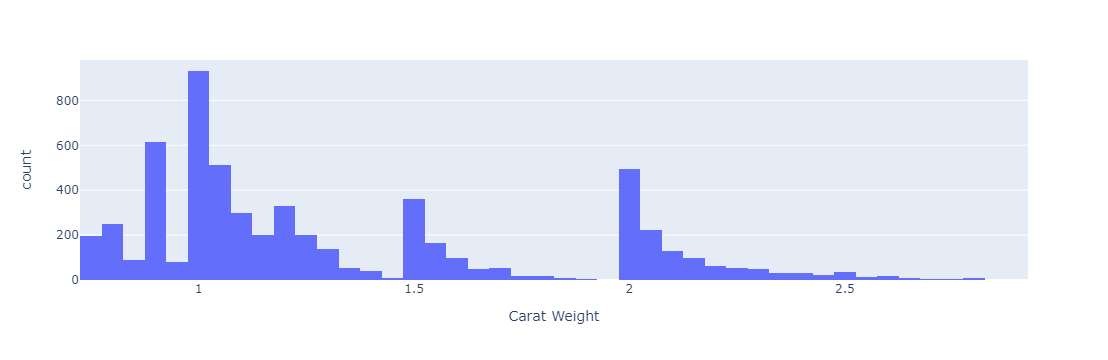

In [30]:
# This is how you build a simple histogram

fig = px.histogram(df, 
                   x = "Carat Weight"
                  )

fig.show()

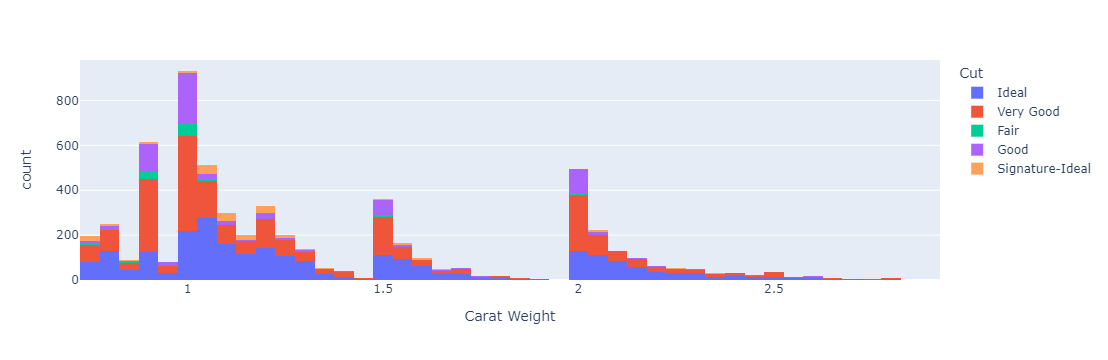

In [31]:
# This is how you build a histogram
# That allows you to look at a feature with more information

fig = px.histogram(df, 
                   x = "Carat Weight",
                   color = "Cut"
                  )

fig.show()

### <font style = "color:rgb(77, 173, 255)"> **Example 2 - Interactive Histograms** </font>

This example will create a histogram inspector that can inspect all features:

In [32]:
# This list was already created above
# It's being shown here as a reminder that we already
# have a list that stores the name of all our features
features

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price'],
      dtype='object')

In [42]:
labels = [None, 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']

In [48]:
# This checkbox will allow you to enable / disable
# the X-Axis going onto a log scale
# default is FALSE
log_scaleX = widgets.Checkbox(value = False,
                              description = 'Log X scale',
                              disabled = False,
                              indent = False
                             )

In [49]:
# This checkbox will allow you to enable / disable
# the Y-Axis going onto a log scale
# default is FALSE
log_scaleY = widgets.Checkbox(value = False,
                              description = 'Log Y scale',
                              disabled = False,
                              indent = False
                             )

In [50]:
# This radiobutton holds options that 
# allows us to understand the distribution
# using boxplots, violon, rug, etc...

marginals = widgets.RadioButtons(options = [None, 'box', 'violin', 'rug'])  # 'histogram' Histogram is excluded from this list

In [51]:
# this radio button holds options that allows
# you to chose if the histgram is stacked (relative)
# grouped, or overlayed.
radio_input = widgets.RadioButtons(options = ['relative', 'group', 'overlay']) # Declare the set of radio buttons and provide options

In [54]:
@widgets.interact
def data_inspector(distribution = marginals, grouping = radio_input, label = labels, feature = features, log_x = log_scaleX, log_y = log_scaleY):
    
    fig = px.histogram(df,
                       x = feature,
                       color = label,
                       marginal = distribution,
                       barmode = grouping,
                       log_x = log_x,
                       log_y = log_y,
                       hover_data = df.columns,
                       #height = 800, 
                       #width = 1650
                      )
    fig.show()

interactive(children=(RadioButtons(description='distribution', index=1, options=(None, 'box', 'violin', 'rug')…

### <font style = "color:rgb(77, 173, 255)"> **Questions to ask yourself when analyzing histograms** </font>

When analyzing histograms, ask yourself these questions related to the distribution of information:

1. Can you identify which features are categorical, and which are continious?

2. Can you identify these kinds of distribution patterns in either categorical or continous features:

> For **categorical features**:

> * Binomial

> * Uniform

> * Geometric

> * Poisson

> * Hypergeometric

> For **continous features**:

> * Uniforn or Multi-modal

> * Triangular

> * Normal (Gaussian)

> * Logistic

> * Exponential

> * Lognormal

> * Minimum Extreme


3. Can you find a target class?

> Is there more than one?

> List all potential target classes and why.

4. Does the feature have enough information to be used in making a prediction?

## <font style = "color:rgb(77, 173, 255)"> **Box Plots** </font>

[A box plot shows the distribution of data for a continuous variable](https://www.jmp.com/en_us/statistics-knowledge-portal/exploratory-data-analysis/box-plot.html). Box plots help you see the center and spread of data. You can also use them as a visual tool to check for normality or to identify points that may be outliers.

You can learn more about box plot, and where to use them at [Statistical Knowledge Portal](https://www.jmp.com/en_us/statistics-knowledge-portal/exploratory-data-analysis/box-plot.html)

The following code makes a few simple histograms using the plotly library. You can learn more about plotly histograms here: https://plotly.com/python/histograms/

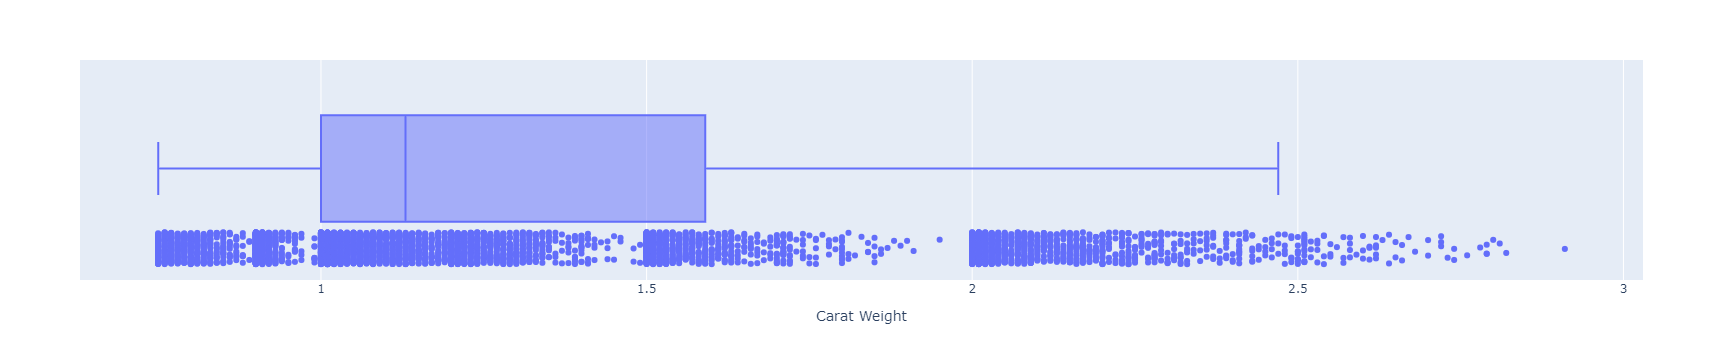

In [58]:
# Create a simple box plot

fig = px.box(df, 
             x = 'Carat Weight', 
             points = 'all'
            )
fig.show()

In [56]:
# This widget allows you to create a histogram, like the ones produces in the previous notebook.
# You can change the feature, along with 
@widgets.interact
def box_inspect(label = labels, feature = features):

    fig = px.box(df, 
                 x = feature,
                 color = label,
                 points = "all",
                 height = 800,
                 width = 1650
                )

    fig.show()

interactive(children=(Dropdown(description='label', options=(None, 'Cut', 'Color', 'Clarity', 'Polish', 'Symme…

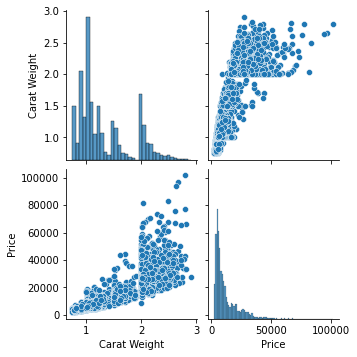

In [60]:
sns.pairplot(df)

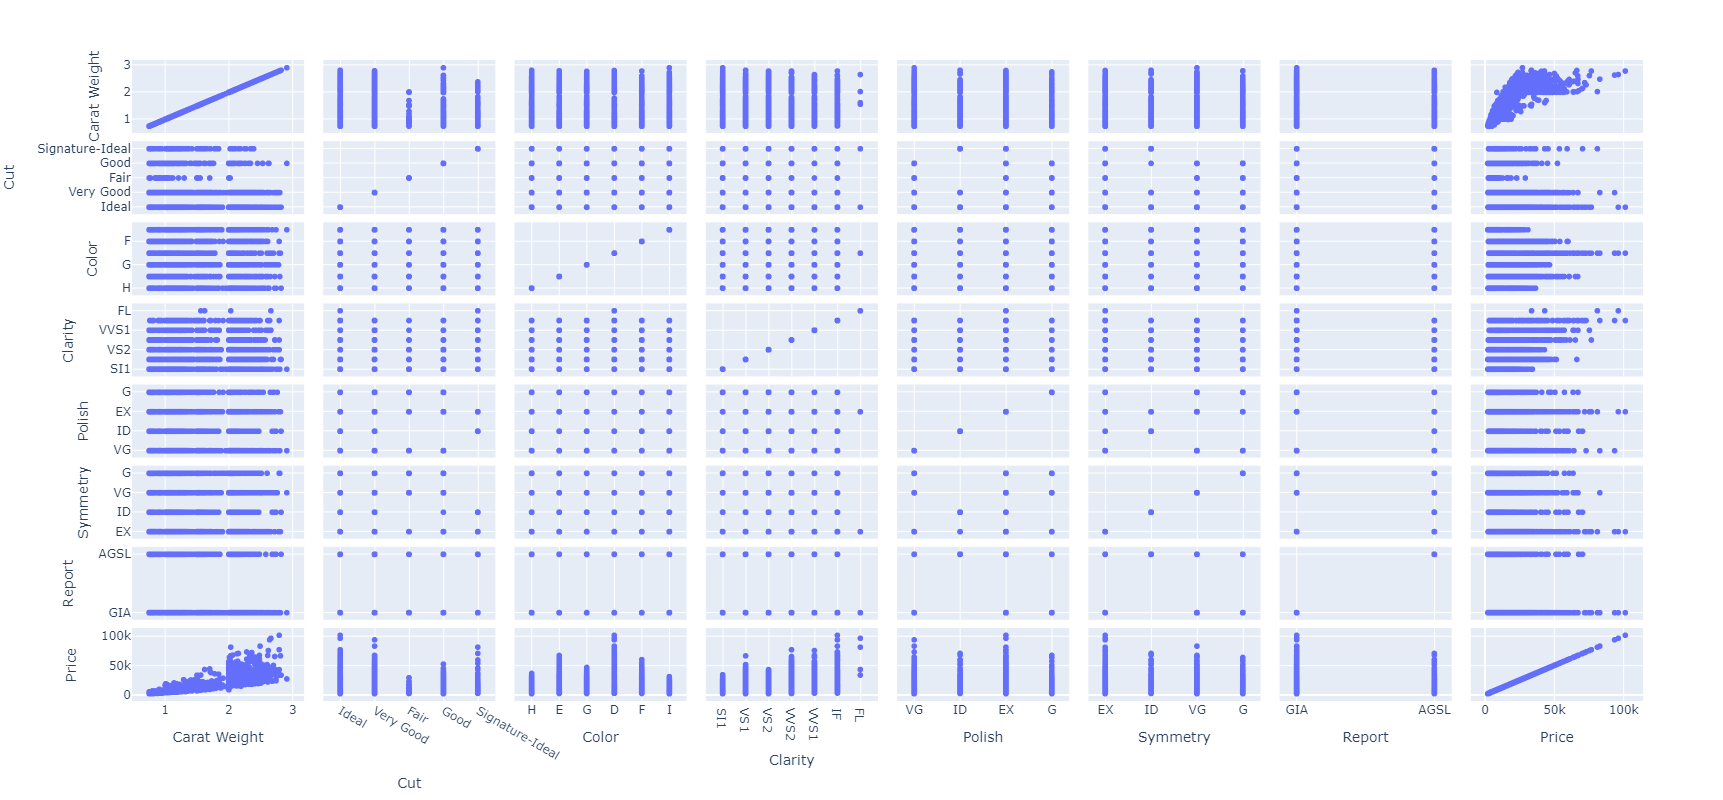

In [62]:
fig = px.scatter_matrix(df,
                       dimensions = features,
                       height = 800)
fig.show()

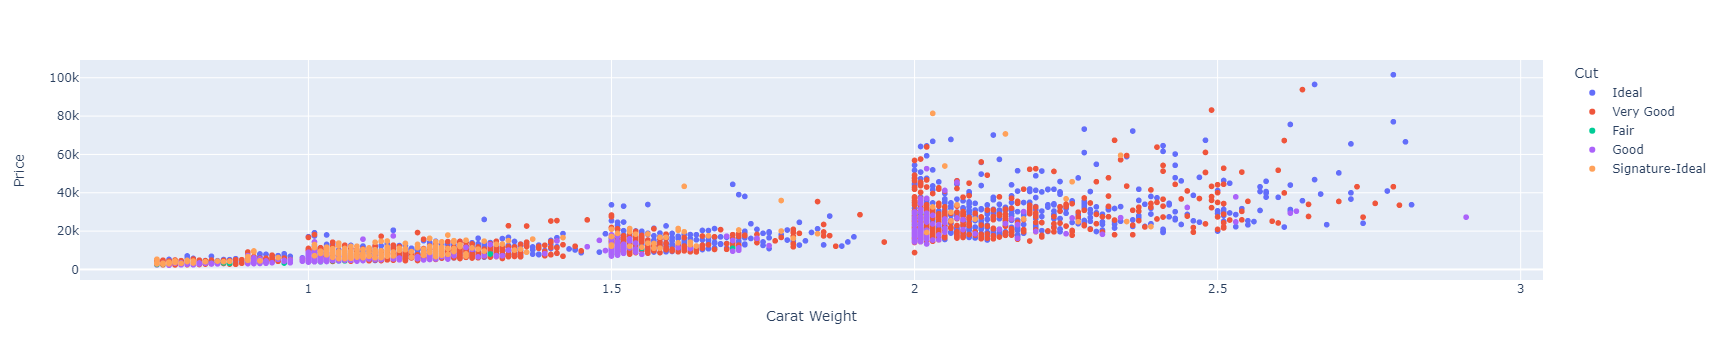

In [73]:
fig = px.scatter(df, x="Carat Weight", y= "Price", color = "Cut")
fig.show()

In [70]:
px.scatter?

Signature:
px.scatter(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    symbol=None,
    size=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    symbol_sequence=None,
    symbol_map=None,
    opacity=None,
    size_max=None,
    marginal_x=None,
    marginal_y=None,
    trendline=None,
    trendline_options=None,
    trendline_color_override=None,
    trendline_scope='trace',
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    render_mode='auto',
